### Logistic Regression

Estimates the probability that an instance belongs to a particular class. If the estimated probability is greater than 0.5, the model predicts that the instance belongs to that class, and otherwise predicts that it does not. Logistic Regression is a **binary classifier**. 

It computes a weighted sum of the input features plus a bias term and outputs the logistic of this result: 

$\hat{p}$ = $h_{\theta}(x)$ = $\sigma(\theta^{T}x)$

 * $\sigma$ is a sigmoid function that outputs a number between 0 and 1. 

$\sigma(t)$ = $\frac{1}{1 + exp(-t)}$

**Cost function of a single training instance**

The objective of training is to set the parameter vector $\theta$ so that the model estimates high probabilities for positive instances and low probabilities for negative instances. 

$c(\theta)$ = -log($\hat{p}$) if $y$ = 1 OR -log(1 - $\hat{p}$) if $y$ = 0

**Cost function over the whole training set** 

Average cost over all training instances (log loss):

$J(\theta)$ = $\frac{-1}{m}$ $\sum_{i = 1}^{m}$ [ $y^{(i)}$ $log(\hat{p}^{(i)})$ + (1-$y^{(i)}$)$log(1-\hat{p}^{(i)})$ ]


**!** There is **no closed form solution** for the log loss cost function, but the function is **convex** and therefore Gradient Descent is guaranteed to find the global minimum. The partial derivatives with respect to the model parameters $\theta_{i}$ are: 

$\frac{\partial J(\theta)}{\partial \theta_{i}}$ = $\sum_{i = 1}^{m}$ ($\sigma(\theta^{T}x^{(i)} - y^{(i)})$ $x_{j}^{(i)}$

#### Decision boundaries

In [1]:
from sklearn import datasets 
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [3]:
import numpy as np
X = iris['data'][:, 3:] # Extract petal width
y = (iris['target'] == 2).astype(np.int) # 1 if Iris Virginica, 0 otherwise

In [4]:
from sklearn.linear_model import LogisticRegression 
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

Text(0, 0.5, 'Probability')

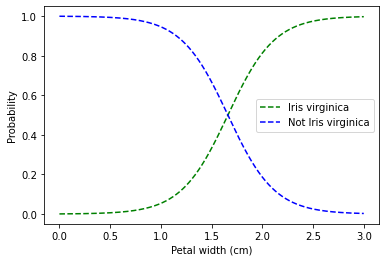

In [11]:
import matplotlib.pyplot as plt
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g--", label = "Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label = "Not Iris virginica")
plt.legend(["Iris virginica", "Not Iris virginica"])
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")

At around 1.6 cm petal width, both probabilities are 0.5, making it the **decision boundary**. If the petal width is higher than 1.6 cm, the model will predict that the flower is an Iris viriginica, and otherwise it will predict that it is not. 

#### Regularization 

Logistic Regression models can be regularized using L1 or L2 penalties (the default in sklearn is L2). The hyperparameter controlling the regularization strenght is not $\alpha$ but its inverse $C$: the higher the value of $C$, the **less** the model is regularized. 

### Softmax Regression

= generalization of the Logistic Regression model to support multiple classes without having to train and combine multiple binary classifiers. 

 * When given an instance $x$, the Softmax Regression first computes a score $s_{k}(x)$ for each class $k$. 
 
 * Applies softmax function to the score of every class for the instance $x$ to estimate the probability $\hat{p}_{k}$ that the instance belongs to class $k$ 
 
$s_{k}(x)$ = $(\theta^{(k)})^{T}x$ 

**Softmax function**

$\hat{p}_{k}$ = $\sigma(s(x))_{k}$ = $\frac{exp(s_{k}(x))}{\sum_{j = 1}^{K}exp(s_{j}(x))}$

 * K = number of classes 
 * $s(x)$ = vector containing the scores of each class for the instance $x$ 
 * $\sigma(s(x))_{k}$ = estimated probability that the instance $x$ belongs to class $k$ given the scores of each class for that instance
 

**Prediction function**

$\hat{y}$ = $argmax_{k}$ $\sigma(s(x))_{k}$ = $argmax_{k}$ $s_{k}(x)$ = $argmax_{k}$ $((\theta^{(k)})^{T}x)$

The argmax operator returns the value of a variable that maximizes a function. 

**!!** Softmax Regression can only be used with mutually exclusive classes (it is a multiclass model, not multioutput) 


**Cost function: cross entropy** 

During training, the objective is again to have a model that estimates a high probability for the target class and consequently low probabilities for the other classes. 

$J(\theta)$ = $\frac{-1}{m}$ $\sum_{i = 1}^{m}$ $\sum_{k = 1}^{K}$ $y_{k}^{(i)}$ $log(\hat{p}^{(i)}_{k})$

 * $y_{k}^{(i)}$ = target probability that the i-th instance belongs to class k
 
**!!** When there are only 2 classes, this cost function is equivalent to the Logistic Regression cost function. 

**Gradient vector of the cross entropy function**

$\nabla_{\theta^{(k)}}J(\theta)$ = $\frac{1}{m}$ $\sum_{i = 1}^{m}$ $(\hat{p}^{(i)}_{k} - y^{(i)}_{k})x^{(i)}$

**!!** By default, LogisticRegression class in sklearn uses one-vs-rest when we train it on more than two classes. To switch to Softmax Regression we need to change the hyperparameter **multi_class = "multinomial"** and we need to specify a solver that supports Softmax Regression such as **"lbfgs"**. 

In [12]:
X = iris['data'][:, (2,3)] # petal length and petal width 
y = iris['target']

softmax_reg = LogisticRegression(multi_class = "multinomial", solver = "lbfgs", C = 10)
softmax_reg.fit(X, y)
softmax_reg.predict([[5, 2]])

array([2])

In [13]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

#### End of notebook